stress3에서 이상치 제거해봄

type_of_meal_plan 제거

In [2]:
# 필요한 모듈 import
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# train, test 데이터 가져오기
# booking_status는 0, 1로 바꾸어 가져오기
train = pd.read_csv('./train.csv')
train["booking_status"] = train["booking_status"].replace({'Canceled':1, 'Not_Canceled':0})

test = pd.read_csv('./test.csv')
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0


In [4]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# import folium
# from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [5]:
# feature 생성(1)
# no_of_total_nights = no_of_weekend_nights + no_of_week_nights
train['no_of_total_nights'] = train['no_of_weekend_nights'] + train['no_of_week_nights']

test['no_of_total_nights'] = test['no_of_weekend_nights'] + test['no_of_week_nights']

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  object 
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

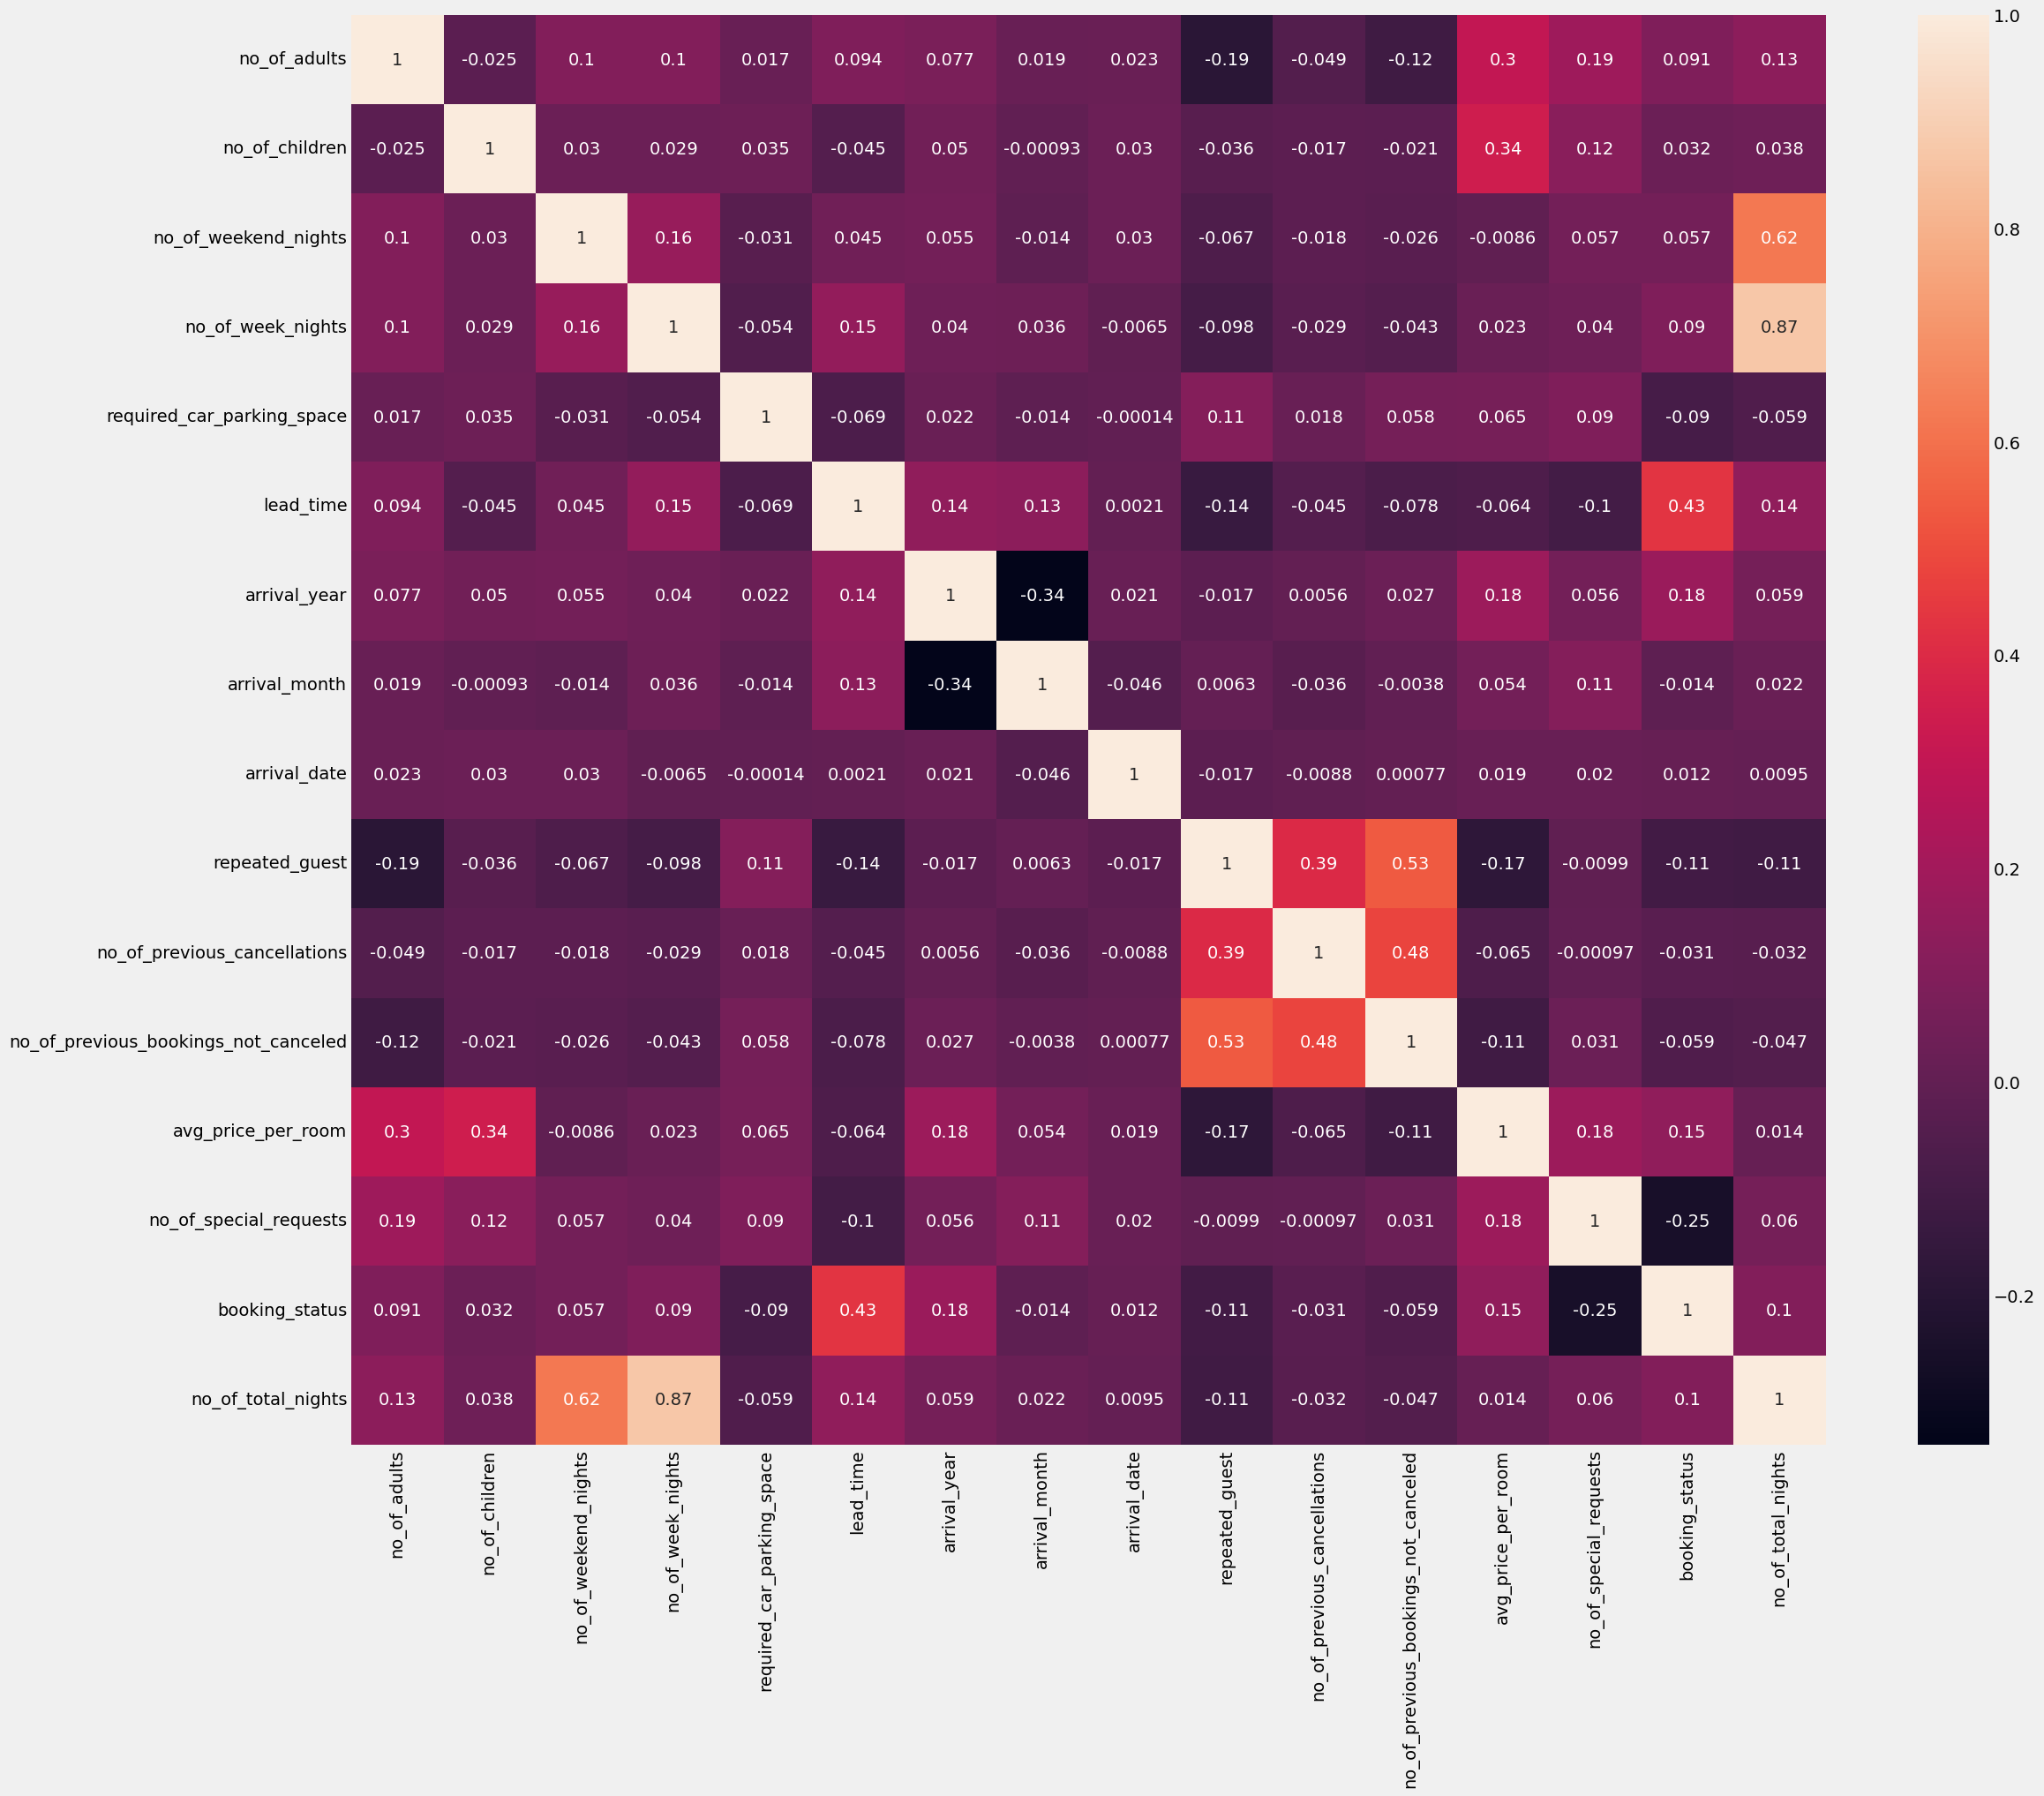

In [6]:
plt.figure(figsize=(24, 20))
corr = train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [7]:
correlation = train.corr()['booking_status'].abs().sort_values(ascending = False)
correlation

booking_status                          1.000000
lead_time                               0.432341
no_of_special_requests                  0.254901
arrival_year                            0.175495
avg_price_per_room                      0.145585
repeated_guest                          0.106916
no_of_total_nights                      0.099812
no_of_adults                            0.091378
required_car_parking_space              0.090402
no_of_week_nights                       0.090325
no_of_previous_bookings_not_canceled    0.058706
no_of_weekend_nights                    0.057094
no_of_children                          0.031683
no_of_previous_cancellations            0.030817
arrival_month                           0.014238
arrival_date                            0.011965
Name: booking_status, dtype: float64

In [8]:
# 필요없는 feature drop
feature_drop = [
    'arrival_date',
    'arrival_month',
    'no_of_previous_cancellations',
    'no_of_children',
    'no_of_weekend_nights',
    # 'no_of_previous_bookings_not_canceled',
    'type_of_meal_plan'
]

train.drop(feature_drop, axis=1, inplace=True)
test.drop(feature_drop, axis=1, inplace=True)

In [9]:
test.head()

,Booking_ID,no_of_adults,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights
0,INN04969,2,0,0,Room_Type 1,3,2017,Online,0,0,90.00,3,1
1,INN34541,2,2,0,Room_Type 4,9,2018,Offline,0,0,48.67,0,3
2,INN36109,2,2,0,Room_Type 1,24,2018,Online,0,0,95.20,1,4
3,INN01554,2,3,0,Room_Type 1,23,2018,Online,0,0,127.67,0,3
4,INN24975,2,2,0,Room_Type 4,9,2018,Online,0,0,201.50,2,2


In [10]:
# train data에 대해
cat_cols = [col for col in train.columns if train[col].dtype == object]

cat_df = train[cat_cols]

cat_df.drop(['Booking_ID'], axis=1, inplace=True)

# cat_df['type_of_meal_plan'].value_counts()
# cat_df['room_type_reserved'].value_counts()
# cat_df['market_segment_type'].value_counts()

In [11]:
# cat_df['type_of_meal_plan'] = cat_df['type_of_meal_plan'].map({
#     'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Not Selected': 2, 'Meal Plan 3': 0
# })

cat_df['room_type_reserved'] = cat_df['room_type_reserved'].map({
    'Room_Type 1': 0, 'Room_Type 4': 1, 'Room_Type 6': 2, 'Room_Type 5': 3, 'Room_Type 2': 4, 'Room_Type 7': 5, 'Room_Type 3': 6
})

cat_df['market_segment_type'] = cat_df['market_segment_type'].map({
    'Online': 0, 'Offline': 1, 'Corporate': 2, 'Complementary': 3, 'Aviation': 4
})

cat_df.head()

,room_type_reserved,market_segment_type
0,0,0
1,0,0
2,1,0
3,0,1
4,0,0


In [12]:
# test data에 대해서
t_cat_cols = [col for col in test.columns if test[col].dtype == object]

t_cat_df = test[t_cat_cols]

t_cat_df.drop(['Booking_ID'], axis=1, inplace=True)

In [13]:
# t_cat_df['type_of_meal_plan'] = t_cat_df['type_of_meal_plan'].map({
#     'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Not Selected': 2, 'Meal Plan 3': 0, 
# })

t_cat_df['room_type_reserved'] = t_cat_df['room_type_reserved'].map({
    'Room_Type 1': 0, 'Room_Type 4': 1, 'Room_Type 6': 2, 'Room_Type 5': 3, 'Room_Type 2': 4, 'Room_Type 7': 5, 'Room_Type 3': 6
})

t_cat_df['market_segment_type'] = t_cat_df['market_segment_type'].map({
    'Online': 0, 'Offline': 1, 'Corporate': 2, 'Complementary': 3, 'Aviation': 4
})

t_cat_df.head()

,room_type_reserved,market_segment_type
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0


In [14]:
# train data에 대해
num_df = train.drop(columns=cat_cols, axis=1)
num_df.drop('booking_status', axis=1, inplace=True)
num_df

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
# num_df['arrival_month'] = np.log(num_df['arrival_month'] + 1)
# num_df['arrival_date'] = np.log(num_df['arrival_date'] + 1)
num_df['avg_price_per_room'] = np.log(num_df['avg_price_per_room'] + 1)

In [15]:
# test data에 대해
t_num_df = test.drop(columns=t_cat_cols, axis=1)
# t_num_df.drop('booking_status', axis=1, inplace=True)
t_num_df

t_num_df['lead_time'] = np.log(t_num_df['lead_time'] + 1)
# num_df['arrival_month'] = np.log(num_df['arrival_month'] + 1)
# num_df['arrival_date'] = np.log(num_df['arrival_date'] + 1)
t_num_df['avg_price_per_room'] = np.log(t_num_df['avg_price_per_room'] + 1)

In [16]:
new_train = pd.concat([cat_df, num_df], axis=1)
target = train['booking_status']

In [17]:
new_test = pd.concat([t_cat_df, t_num_df], axis=1)

#### 추가로 넣어봄(이상치 제거)
column수가 안맞는다

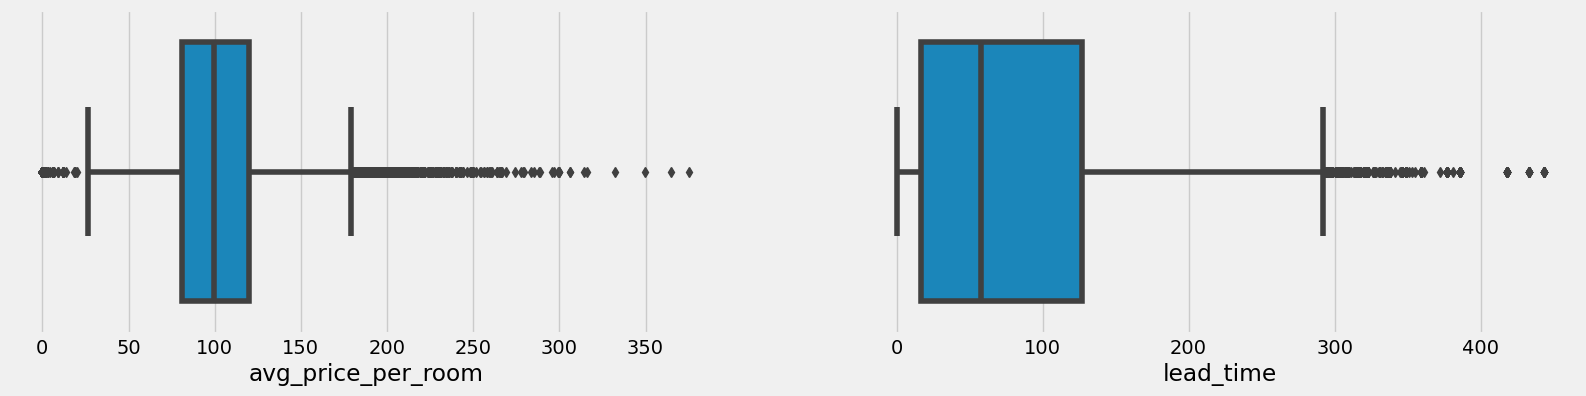

In [18]:
outliers_col = ['avg_price_per_room', 'lead_time']

fig, axis = plt.subplots(1, 2, figsize=(18,4))
ax = axis.flatten()

for i, fea in enumerate(outliers_col): 
    sns.boxplot(data=train, x=train[fea], ax=axis[i])

In [20]:
new_train = train[train['avg_price_per_room'] < 340]
new_train = train[train['lead_time'] < 400]

In [21]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25321 entries, 0 to 25391
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25321 non-null  object 
 1   no_of_adults                          25321 non-null  int64  
 2   no_of_week_nights                     25321 non-null  int64  
 3   required_car_parking_space            25321 non-null  int64  
 4   room_type_reserved                    25321 non-null  object 
 5   lead_time                             25321 non-null  int64  
 6   arrival_year                          25321 non-null  int64  
 7   market_segment_type                   25321 non-null  object 
 8   repeated_guest                        25321 non-null  int64  
 9   no_of_previous_bookings_not_canceled  25321 non-null  int64  
 10  avg_price_per_room                    25321 non-null  float64
 11  no_of_special_r

In [22]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   room_type_reserved                    10883 non-null  int64  
 1   market_segment_type                   10883 non-null  int64  
 2   no_of_adults                          10883 non-null  int64  
 3   no_of_week_nights                     10883 non-null  int64  
 4   required_car_parking_space            10883 non-null  int64  
 5   lead_time                             10883 non-null  float64
 6   arrival_year                          10883 non-null  int64  
 7   repeated_guest                        10883 non-null  int64  
 8   no_of_previous_bookings_not_canceled  10883 non-null  int64  
 9   avg_price_per_room                    10883 non-null  float64
 10  no_of_special_requests                10883 non-null  int64  
 11  no_of_total_nig

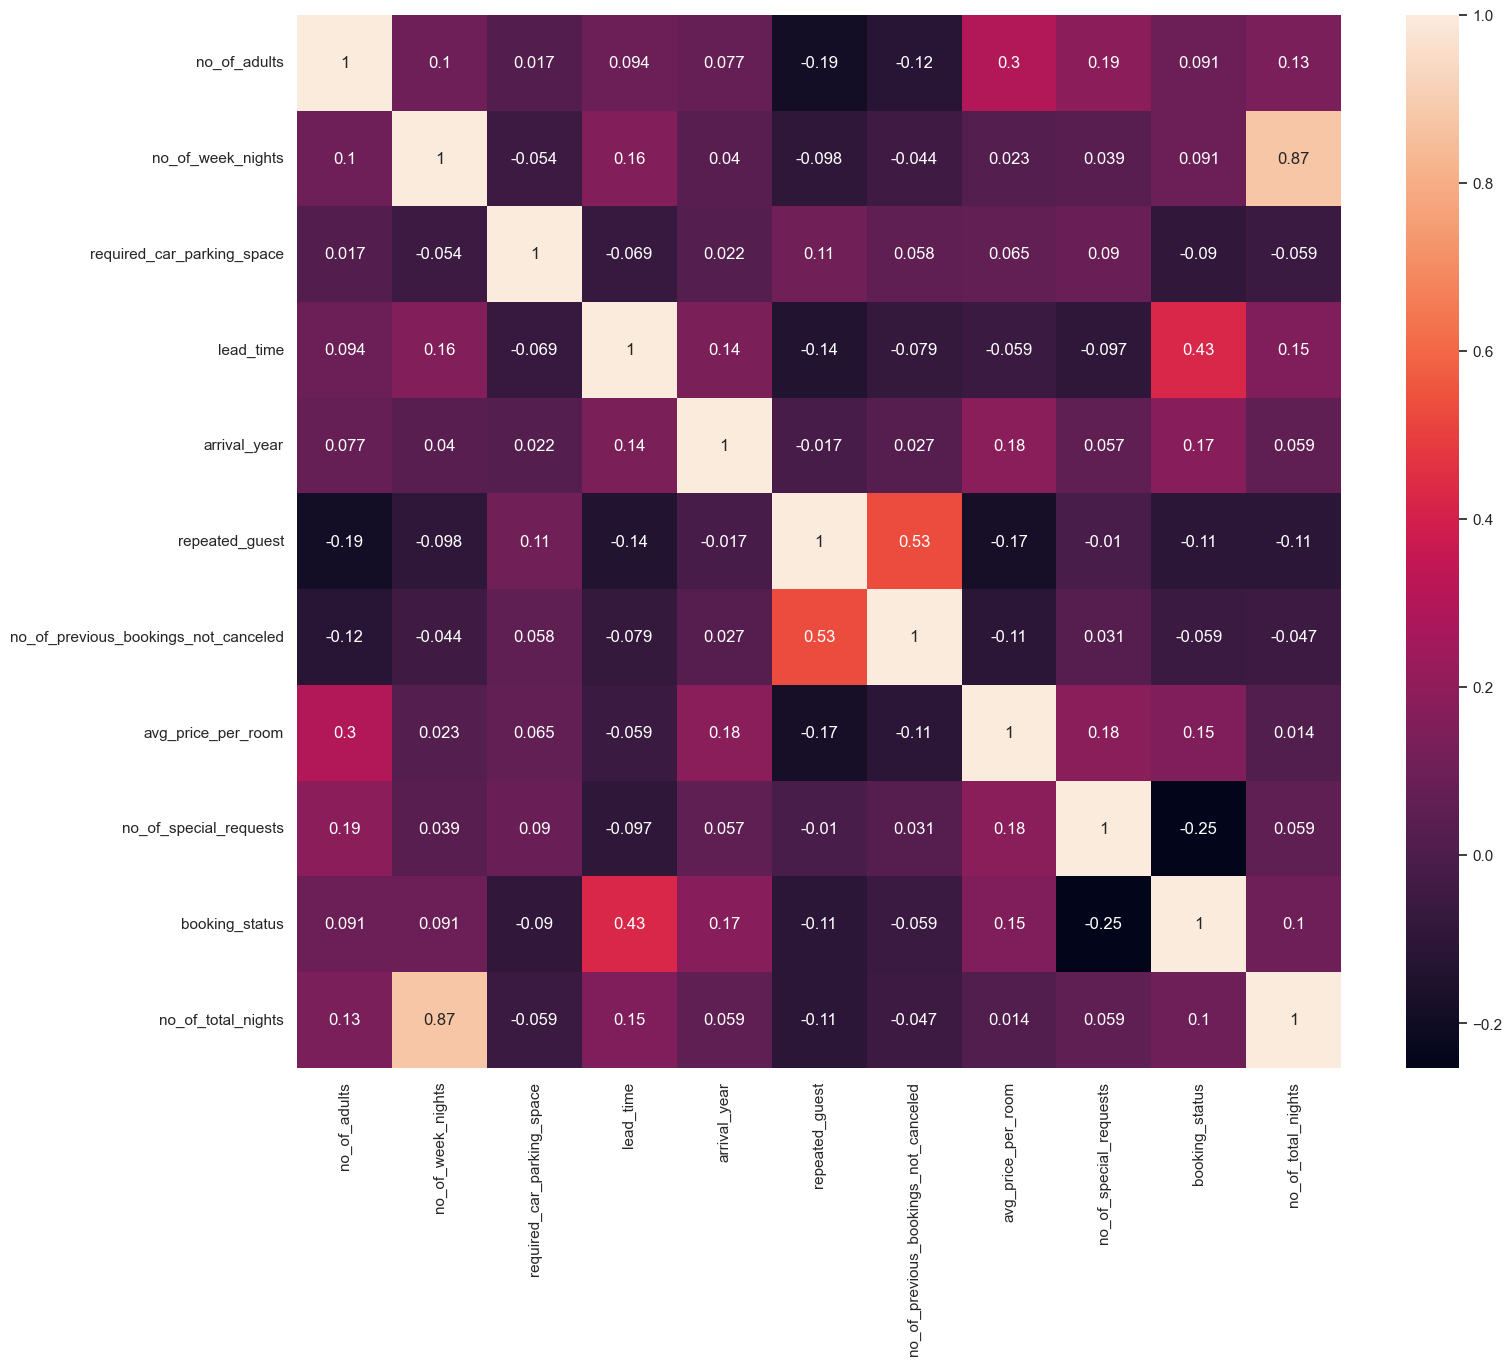

In [23]:
sns.set(rc={'figure.figsize':(15,13)}) 
correlation_matrix = new_train.corr()
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [26]:
knn = KNeighborsClassifier(
    n_neighbors=37,
    # leaf_size=10,
    weights='distance',
    p=1,
    metric='manhattan'
)
scoring = 'accuracy'
# knn.fit(new_train, target)
score = cross_val_score(knn, new_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

ValueError: Found input variables with inconsistent numbers of samples: [25321, 25392]

In [46]:
# kNN score
round(np.mean(score) * 100, 2)

87.1

In [47]:
clf_tree2 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=4,
    # random_state=1
)
scoring = 'accuracy'
score = cross_val_score(clf_tree2, new_train, target, cv=k_fold, n_jobs=2, scoring=scoring)
print(score)

[0.86968504 0.8503937  0.87632926 0.85151635 0.85781804 0.86451359
 0.85466719 0.8653013  0.85506105 0.85072863]


In [48]:
# Decision Tree score
round(np.mean(score) * 100, 2)

85.96

In [49]:
knn.fit(new_train, target)
prediction_list = knn.predict(new_test)

submit = pd.read_csv("./sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})
submit

,Booking_ID,booking_status
0,INN04969,0
1,INN34541,0
2,INN36109,0
3,INN01554,1
4,INN24975,0
...,...,...
10878,INN29686,0
10879,INN01107,0
10880,INN06811,0
10881,INN27777,1


In [50]:
submit.to_csv("dt_submit.csv",index=False)